In [1]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

engine = create_engine('sqlite:///MyDB.sqlite3', echo=True)

data = pd.read_sql("select * from item;", con=engine)
data = data.fillna(0)  # 缺失填0
data = data.drop(columns=['id'])

2018-10-24 12:12:44,600 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-10-24 12:12:44,614 INFO sqlalchemy.engine.base.Engine ()
2018-10-24 12:12:44,618 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-10-24 12:12:44,620 INFO sqlalchemy.engine.base.Engine ()
2018-10-24 12:12:44,624 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("select * from item;")
2018-10-24 12:12:44,627 INFO sqlalchemy.engine.base.Engine ()
2018-10-24 12:12:44,631 INFO sqlalchemy.engine.base.Engine select * from item;
2018-10-24 12:12:44,633 INFO sqlalchemy.engine.base.Engine ()


In [2]:
# 将地址分为省，市，区
data["address"] = data["address"].apply(lambda x: x.replace("[", "").replace("]", ""))
data["province"] = data["address"].apply(lambda x: x.split("·")[0])
data["city"] = data["address"].apply(lambda x: x.split("·")[1])
data["area"] = data["address"].apply(lambda x: x.split("·")[-1])

c:\users\11150\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


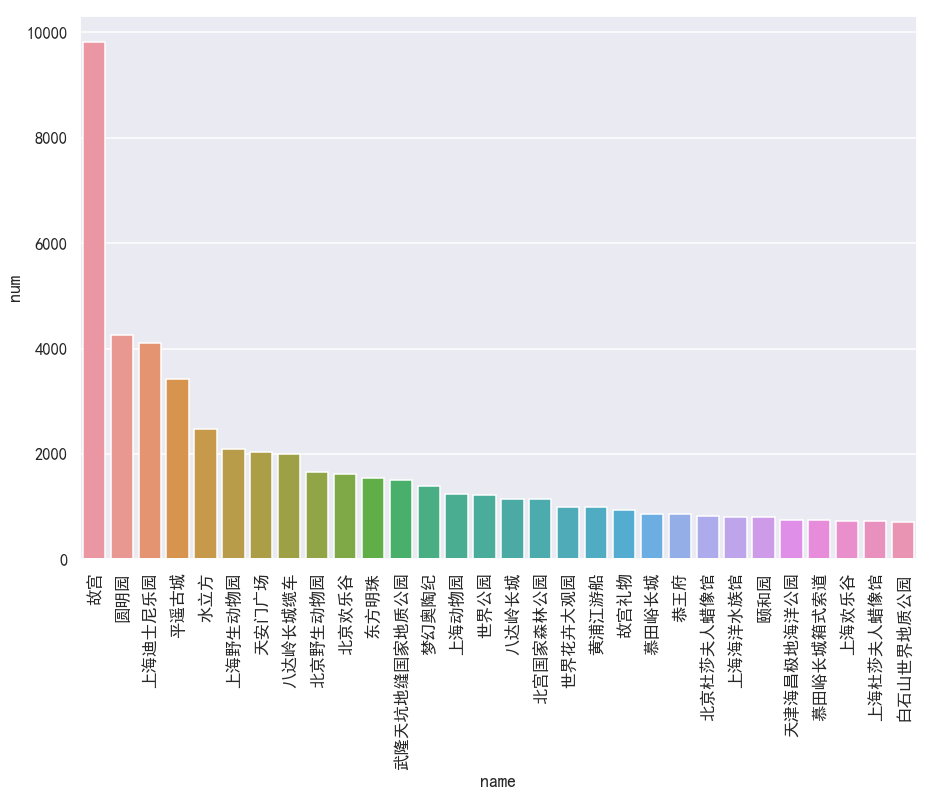

In [3]:
# 销量最多的前30景点
num_top = data.sort_values(by='num', axis=0, ascending=False).reset_index(drop=True)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
sns.set_context("talk")
fig = plt.figure(figsize=(15, 10))
sns.barplot(num_top["name"][:30], num_top["num"][:30])
plt.xticks(rotation=90)
fig.show()

在用pandas进行数据重排时，经常用到stack和unstack两个函数。stack的意思是堆叠，堆积，unstack即“不要堆叠”。
常见的数据的层次化结构有两种，一种是表格，一种是“花括号”，即下面这样的l两种形式：
![](https://webook.mobi:8888/admin/fileadmin/download/tdu%202/20181010163829.png)
未转换之前我们数据格式如下（花括号型）:
![](https://webook.mobi:8888/admin/fileadmin/download/tdu%202/20181010164233.png)
转换后我们的数据格式如下(表格型):
![](https://webook.mobi:8888/admin/fileadmin/download/tdu%202/20181010163948.png)
表格型数据可以使用plot进行画图。

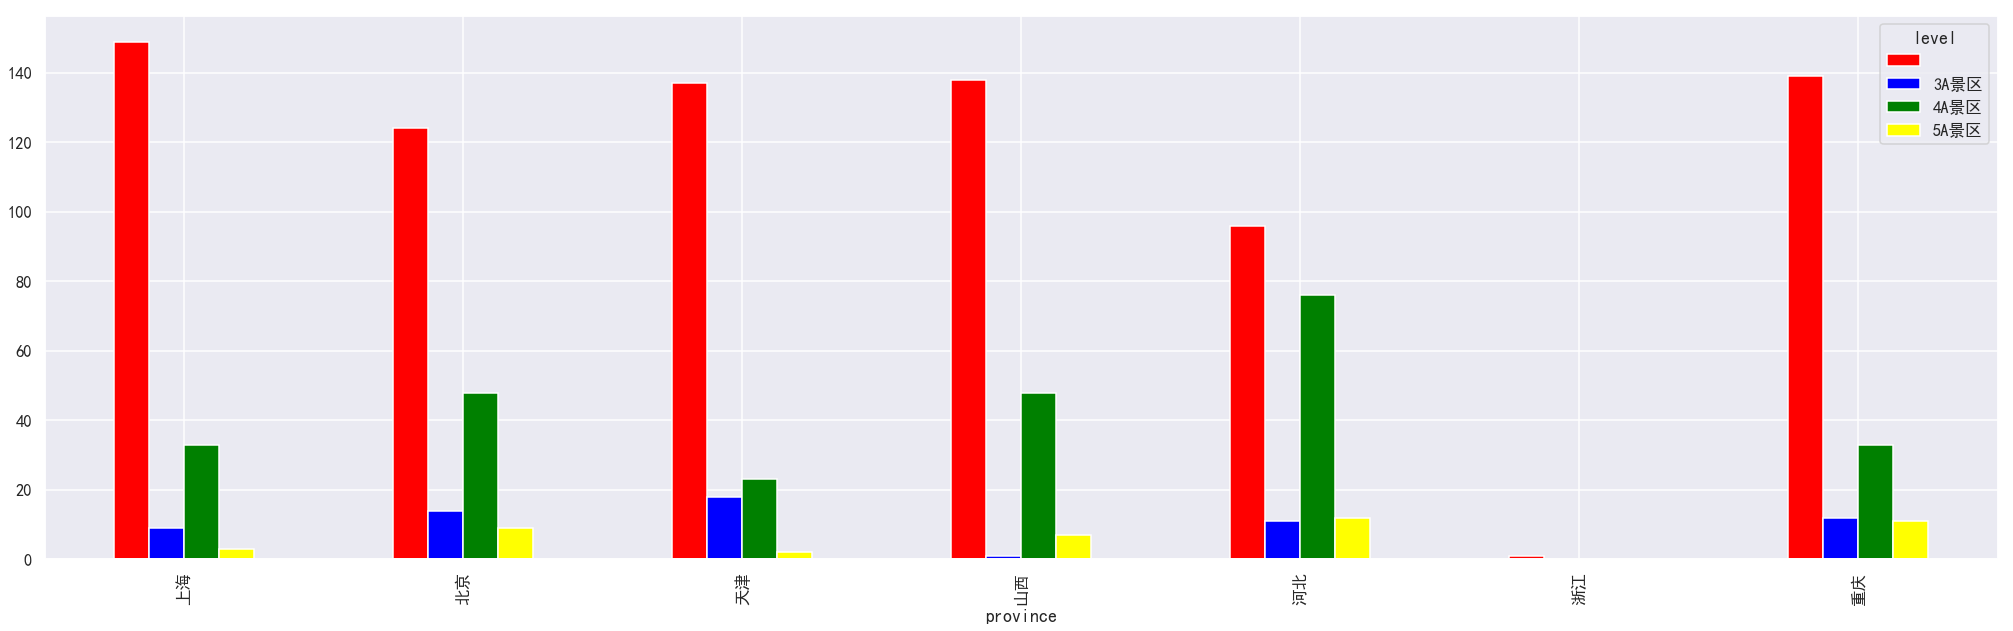

In [74]:
# 省份与景区评级
data['level_sum'] = 1  # 给所有行添加一列数据level_sum，值为1，用来记录总个数
var = data.groupby(['province', 'level']).level_sum.sum()
var.unstack().plot(kind='bar', figsize=(35, 10), stacked=False, color=['red', 'blue', 'green', 'yellow'])

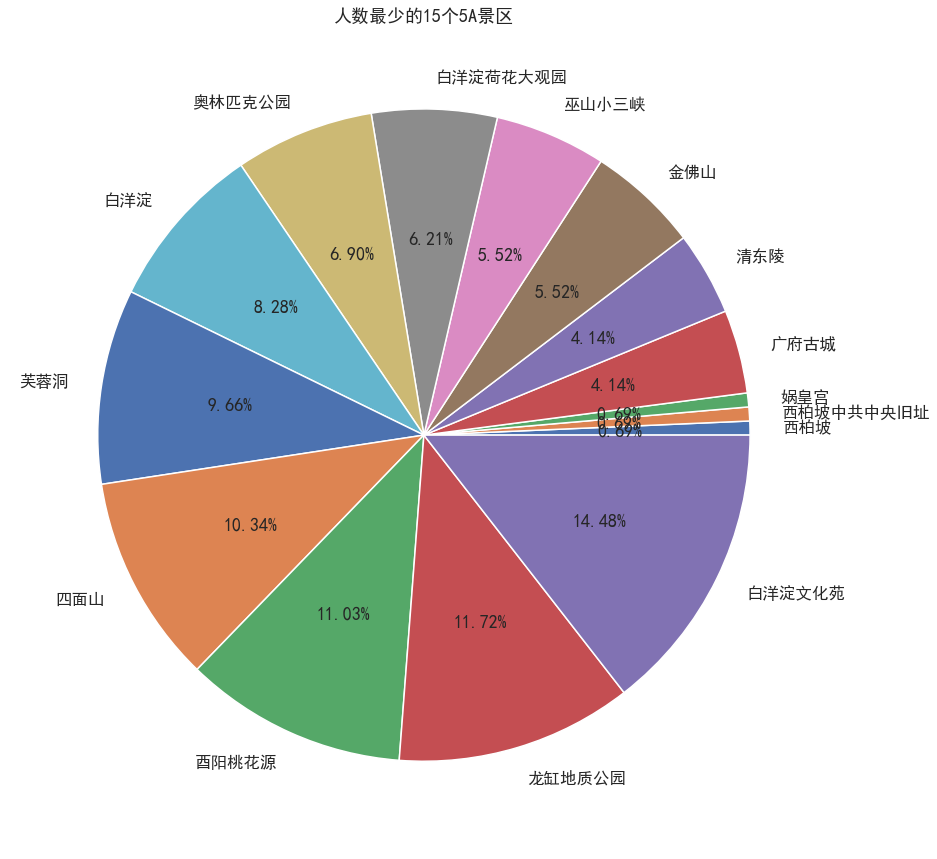

In [80]:
# 人少的5A景点，4A景点，3A景点
top_5A = data[data["level"] == "5A景区"].sort_values(by='num', axis=0, ascending=True).reset_index(drop=True)
top_4A = data[data["level"] == "4A景区"].sort_values(by='num', axis=0, ascending=True).reset_index(drop=True)
top_3A = data[data["level"] == "3A景区"].sort_values(by='num', axis=0, ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(15, 15))
plt.pie(top_5A["num"][:15], labels=top_5A["name"][:15], autopct='%1.2f%%')
plt.title("人数最少的15个5A景区")
plt.show()

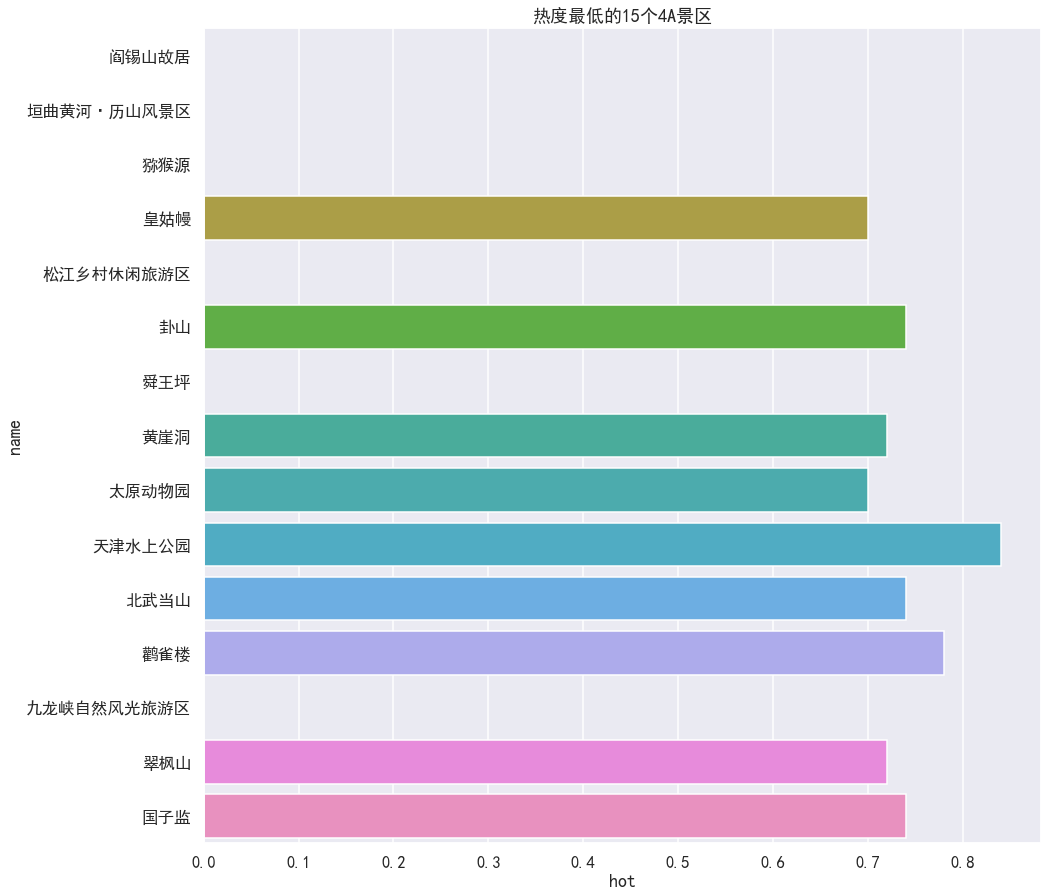

In [81]:
fig = plt.figure(figsize=(15, 15))
ax = sns.barplot(top_4A["hot"][:15], top_4A["name"][:15])
ax.set_title("热度最低的15个4A景区")
fig.show()

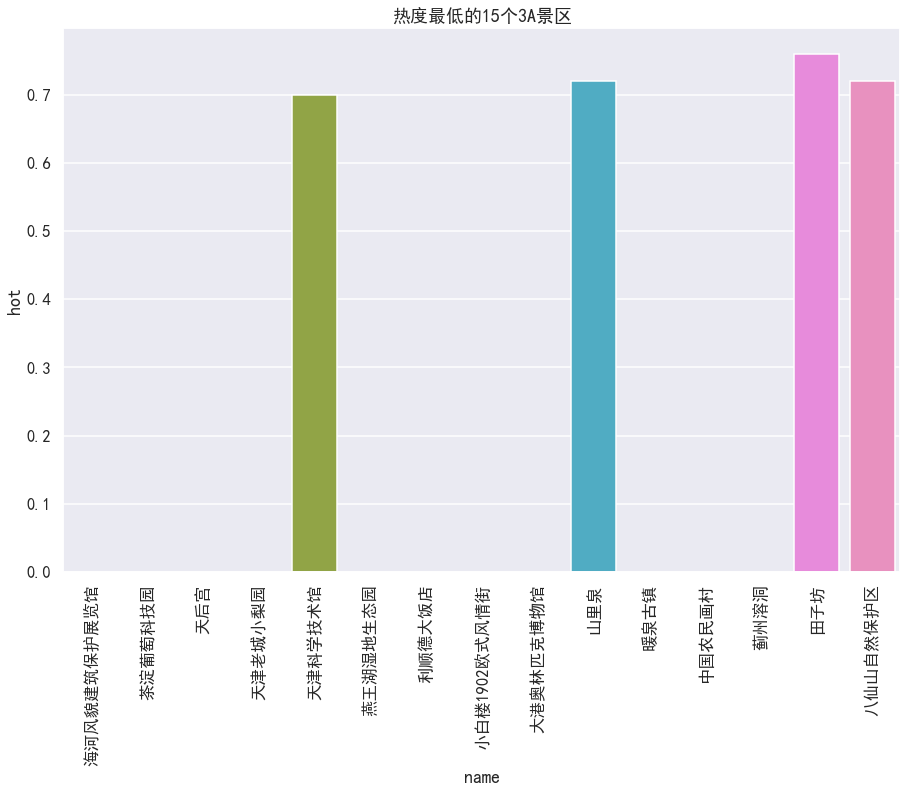

In [82]:
fig = plt.figure(figsize=(15, 10))
ax = sns.barplot(top_3A["name"][:15], top_3A["hot"][:15])
ax.set_title("热度最低的15个3A景区")
plt.xticks(rotation=90)
fig.show()

In [4]:
from 

                      name level   hot        address   num province city  \
0                       故宫  5A景区  1.00      北京·北京·东城区  9824       北京   北京   
1                      圆明园  4A景区  0.76      北京·北京·海淀区  4264       北京   北京   
2                    天安门广场        1.00      北京·北京·东城区  2040       北京   北京   
3                    八达岭长城  5A景区  0.82      北京·北京·延庆县  1144       北京   北京   
4                      颐和园  5A景区  0.82      北京·北京·海淀区   806       北京   北京   
5                      恭王府  5A景区  0.74      北京·北京·西城区   856       北京   北京   
6                  八达岭长城缆车        0.00    北京·北京·八达岭长城  1996       北京   北京   
7                     故宫礼物        0.00       北京·北京·故宫   928       北京   北京   
8                      水立方        0.00   北京·北京·奥林匹克公园  2477       北京   北京   
9                    慕田峪长城  5A景区  0.70      北京·北京·怀柔区   864       北京   北京   
10                    天坛公园  5A景区  0.80      北京·北京·东城区   322       北京   北京   
11                  恭王府大戏楼        0.00      北京·北京·西城区   444       北京   北京   